# Tweet Sentiment Analysis Project

by Brian Amani

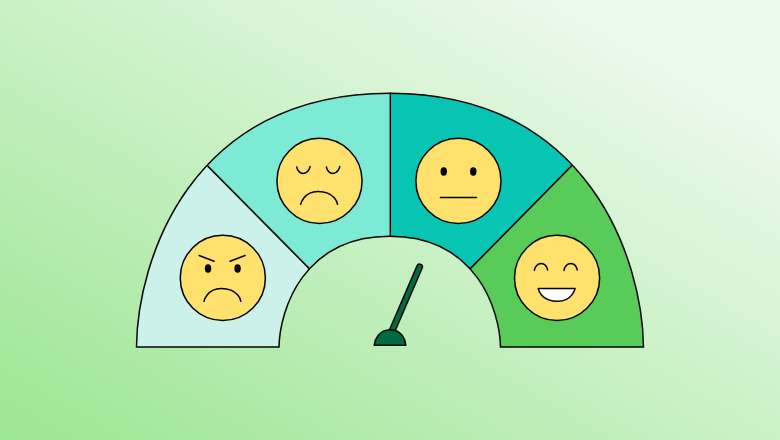

# Overview
### Business Problem

Companies rely on social media to understand how customers feel about their brands and products. However, it’s not always easy to tell whether a tweet expresses a clear opinion or which brand the sentiment is directed at, especially when multiple brands are mentioned.

This project will develop a sentiment analysis model that can:

- Classify tweets as positive, negative, or neutral.
- Correctly link emotions to the right brand or product.
- Track sentiment trends over time to spot issues or opportunities early.

With better sentiment tracking, businesses can fine-tune their marketing, improve customer engagement, and respond faster to brand perception shifts.

### Data Overview

In this project, I will analyze a dataset from CrowdFlower (https://data.world/crowdflower/brands-and-product-emotions/) on the data.world website. The dataset contains over 9000 tweets with sentiments on apple and google products. These sentiments can be classified into positive, neutral and negative sentiments and a quick scan of the data shows they were collected during the SXSW (South by South West) concert seemingly in 2013.

### Approach

### My Thinking
I decided on an approach that would categorize the data into positive and non positive tweets, which would allow a binary approach further considering that positive sentiments would be the ones to most likely be used to drive sales up, and non positive sentiments be studied to establish where to improve products.

### Accuracy:
I also endevoured to achieve as accurate a model as possible as it would allow me to avoid any false positive/negative results that would affect a users ability to utilize the output of the model.

### Modelling
I used nltk's TweetTokenizer and RegexpTokenizer to tokenize the tweets. and further used vectorizer and tfidf vectorizer to vectorize them. 

Techniques used:

- Naïve Bayes for baseline performance,
- Neural Networks to capture complex patterns in sentiment.

Which allowed me to test simple to complex approaches

## Data Understanding

In [1086]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import RegexpTokenizer, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re

from sklearn.model_selection import train_test_split, cross_validate
from numpy import array
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from tensorflow import keras
from keras import regularizers, layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Amani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1087]:
# Loading the dataset
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding = 'unicode_escape')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [1088]:
print(df.describe)

<bound method NDFrame.describe of                                              tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...              

## Data Cleaning

In [1089]:
# Checking for duplicates
print('Duplicate rows')
print(df.duplicated().sum())
print(("-"*10))
print('Total null values')
print(df.isna().sum())
print(("-"*10))
print(df.info())

Duplicate rows
22
----------
Total null values
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None


#### There are 22 duplicate rows and many null values. These need to be dropped. 

In [1090]:
#dropping any NaN in the Tweet column
df['tweet_text'].dropna(inplace=True)
#dropping duplicates
df.drop_duplicates(inplace=True)
print(("-"*10))
print(df.info())
print(("-"*10))
print('Total duplicated rows')
print(df.duplicated().sum())
print(("-"*10))
print('Total null values')
print(df.isna().sum())

----------
<class 'pandas.core.frame.DataFrame'>
Index: 9071 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9070 non-null   object
 1   emotion_in_tweet_is_directed_at                     3282 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9071 non-null   object
dtypes: object(3)
memory usage: 283.5+ KB
None
----------
Total duplicated rows
0
----------
Total null values
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5789
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


In [1091]:
#Rename columns 
df = df.rename(columns = {'tweet_text': 'Tweet', 
                         'emotion_in_tweet_is_directed_at': 'Product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'})
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [1092]:
def is_mostly_symbols(text, threshold=0.7):
    """Returns True if more than `threshold` fraction of characters are special characters."""
    if not isinstance(text, str) or not text.strip():  
        return True  # Remove empty or non-string values
    
    special_chars = sum(1 for char in text if not char.isalnum() and char != " ")
    return (special_chars / len(text)) > threshold  # Remove if too many symbols

# Keep only rows that are NOT mostly symbols
df = df[~df["Tweet"].apply(is_mostly_symbols)]  

# Print first few rows to verify
df


,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [1093]:
df = df[df["Tweet"].apply(lambda x: x.encode('utf-8').decode('utf-8', 'ignore') == x if isinstance(x, str) else True)]
df


,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [1094]:
#drops Tweets with nonsensical characters
df.drop([1, 9092], inplace=True)
#Reset index
df.reset_index(inplace=True)
df.drop(columns="index", inplace = True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
2,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
3,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
4,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
...,...,...,...
9063,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9064,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9065,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9066,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product


#### There are still NaN values in "Product". I will fill those with "Unspecified" to make visualization easier

In [1095]:
#Filling NaN in "Product" with "Unspecified"
df['Product'].fillna("Unspecified", inplace = True)
df

C:\Users\Amani\AppData\Local\Temp\ipykernel_15644\1443895236.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product'].fillna("Unspecified", inplace = True)


,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
2,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
3,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
4,@teachntech00 New iPad Apps For #SpeechTherapy...,Unspecified,No emotion toward brand or product
...,...,...,...
9063,"@mention Yup, but I don't have a third app yet...",Unspecified,No emotion toward brand or product
9064,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9065,"Wave, buzz... RT @mention We interrupt your re...",Unspecified,No emotion toward brand or product
9066,"Google's Zeiger, a physician never reported po...",Unspecified,No emotion toward brand or product


In [1096]:
df["Product"].value_counts()


Product
Unspecified                        5787
iPad                                945
Apple                               659
iPad or iPhone App                  468
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

#### There are too many rows in which the product is not specified. I will attempt to scrape the data set and determine the product and then introduce a new classification called Brand.

In [1097]:
def find_brand(Product, Tweet):
    # Checking "Unspecified" column to identify brand
    brand = 'Unspecified'
    if ((Product.lower().__contains__('google')) or (Product.lower().__contains__('android'))):
        brand = 'Google'
    elif ((Product.lower().__contains__('apple')) or (Product.lower().__contains__('ip'))):
        brand = 'Apple'
    
    if (brand == 'Unspecified'): 
        lower_tweet = Tweet.lower()
        is_google = (lower_tweet.__contains__('google')) or (lower_tweet.__contains__('android'))
        is_apple = (lower_tweet.__contains__('apple')) or (lower_tweet.__contains__('ip'))

        # Labelling the brands
        if (is_google and is_apple):
            brand = 'Both mentioned'
        elif (is_google):
            brand = 'Google'
        elif (is_apple):
            brand = 'Apple'
    
    return brand

df['Brand'] = df.apply(lambda x: find_brand(x['Product'], x['Tweet']), axis = 1) 
df['Brand'].value_counts() 

Brand
Apple             5360
Google            2756
Unspecified        739
Both mentioned     213
Name: count, dtype: int64

#### The data is now more presentable and can be used to train our model. Before we move to preprocessing for modelling, let us visualize the data and gather any insights we need

# Data Visualization

In [1098]:
def countplot(df, col, hue=None, rotation=None):
    
    fig, ax = plt.subplots(figsize=(12,8))
    sns.countplot(data = df, x = col, hue = hue, order = df[col].value_counts().index)
    ax.set_xticklabels(labels = ax.get_xticklabels(), rotation= rotation, fontsize = 15)
    ax.set_xlabel(xlabel = col, fontsize = 20)
    ax.tick_params(axis='y', which='major', labelsize=15)
    ax.set_ylabel(ylabel = "Number of Tweets", fontsize = 20)
    ax.set_title(f"Number of Tweets per {col}", fontsize = 30)
    plt.show()

In [1099]:
# Rephrase "No emotion towards brand or product" to "No emotion"
df["Sentiment"] = df["Sentiment"].replace("No emotion toward brand or product", "No emotion")

C:\Users\Amani\AppData\Local\Temp\ipykernel_15644\4197030935.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ax.get_xticklabels(), rotation= rotation, fontsize = 15)


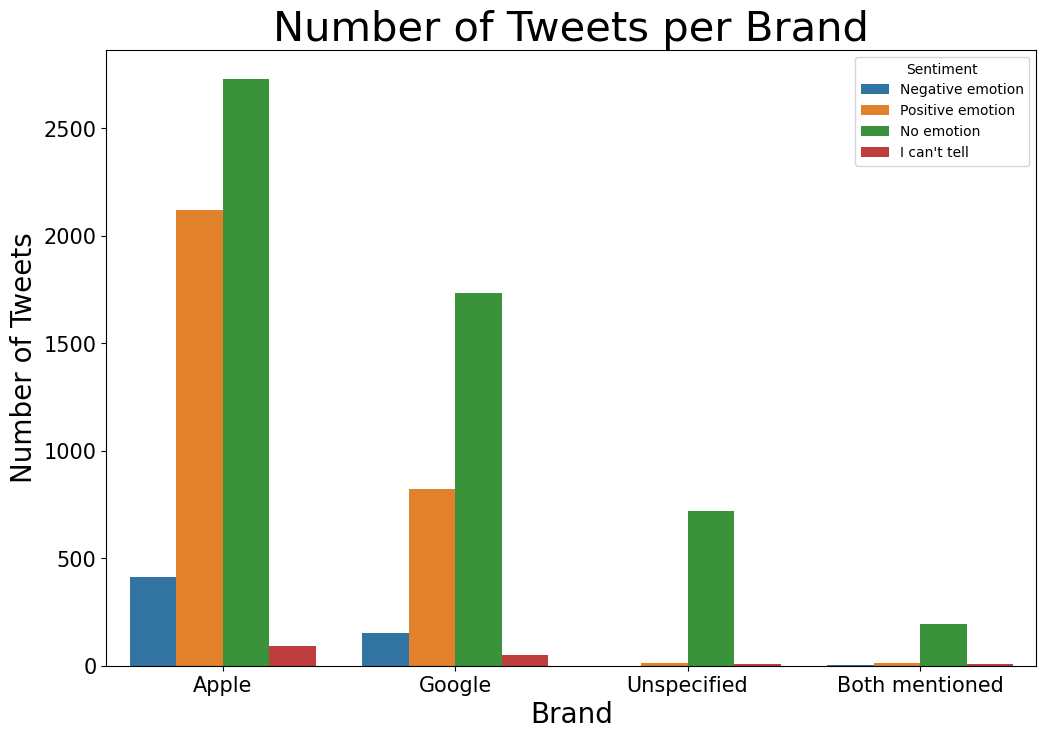

                                 Tweet  Product
Brand          Sentiment                       
Apple          I can't tell         93       93
               Negative emotion    415      415
               No emotion         2730     2730
               Positive emotion   2122     2122
Both mentioned I can't tell          7        7
               Negative emotion      3        3
               No emotion          192      192
               Positive emotion     11       11
Google         I can't tell         50       50
               Negative emotion    150      150
               No emotion         1733     1733
               Positive emotion    823      823
Unspecified    I can't tell          6        6
               Negative emotion      1        1
               No emotion          719      719
               Positive emotion     13       13


In [1100]:
countplot(df, "Brand", hue = "Sentiment")
# Display this information quantitatively in a table
grouped = df.groupby(["Brand", "Sentiment"]).count()
print(grouped)

C:\Users\Amani\AppData\Local\Temp\ipykernel_15644\4197030935.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ax.get_xticklabels(), rotation= rotation, fontsize = 15)


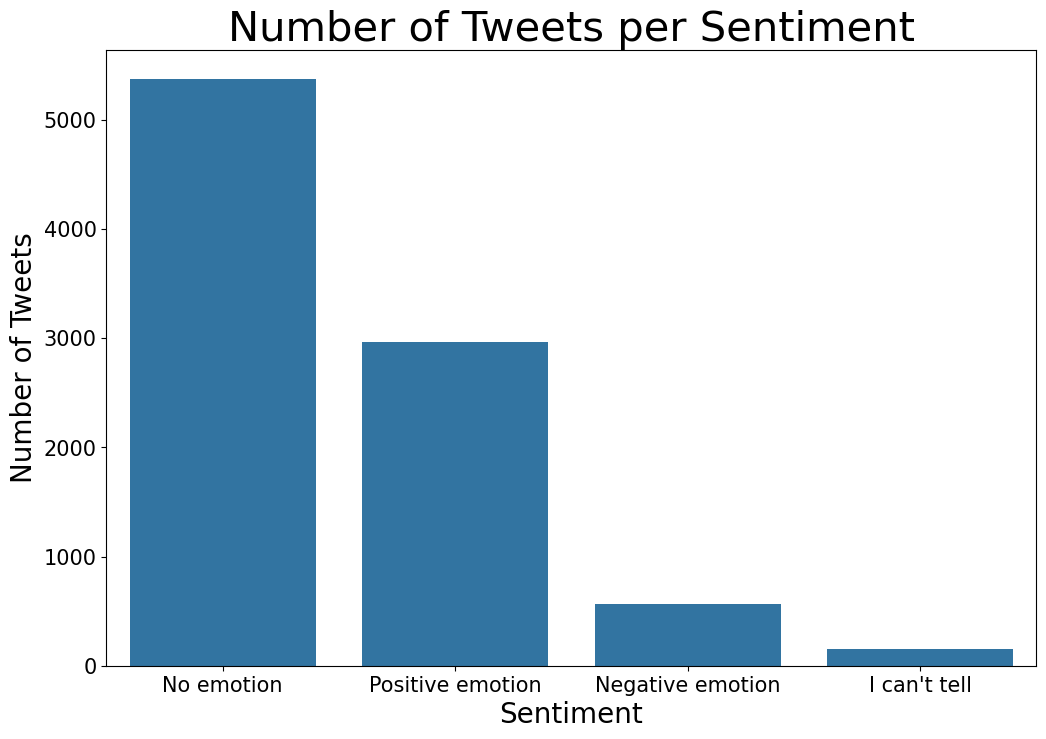

Sentiment
No emotion          5374
Positive emotion    2969
Negative emotion     569
I can't tell         156
Name: count, dtype: int64


In [1101]:
countplot(df, "Sentiment")
print(df['Sentiment'].value_counts())

#### There are no major comments on the data. I moved to preprocessing for modelling. 
- Training data will be the tweet
- Target data will be the sentiments

Based on the data as seen above, it is now important to have binary target data, in this case the sentiments. This will enable us to train our model effectively

# Data Preprocessing

To make our target Binary we need two categories:
- Not positive: No emotion, negative emotion & I can't tell
- Positive: Positive emotion

In [1102]:
df['Sentiment'] = df['Sentiment'].map({'No emotion':0, 
             'Positive emotion':1,
             'Negative emotion':0,
             "I can't tell": 0})
df

,Tweet,Product,Sentiment,Brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,Apple
1,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,Apple
2,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,Apple
3,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1,Google
4,@teachntech00 New iPad Apps For #SpeechTherapy...,Unspecified,0,Apple
...,...,...,...,...
9063,"@mention Yup, but I don't have a third app yet...",Unspecified,0,Google
9064,Ipad everywhere. #SXSW {link},iPad,1,Apple
9065,"Wave, buzz... RT @mention We interrupt your re...",Unspecified,0,Google
9066,"Google's Zeiger, a physician never reported po...",Unspecified,0,Google


C:\Users\Amani\AppData\Local\Temp\ipykernel_15644\405641662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "Sentiment", order = df["Sentiment"].value_counts().index , palette="husl")
C:\Users\Amani\AppData\Local\Temp\ipykernel_15644\405641662.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ["Not Positive", "Positive"], fontsize = 15)


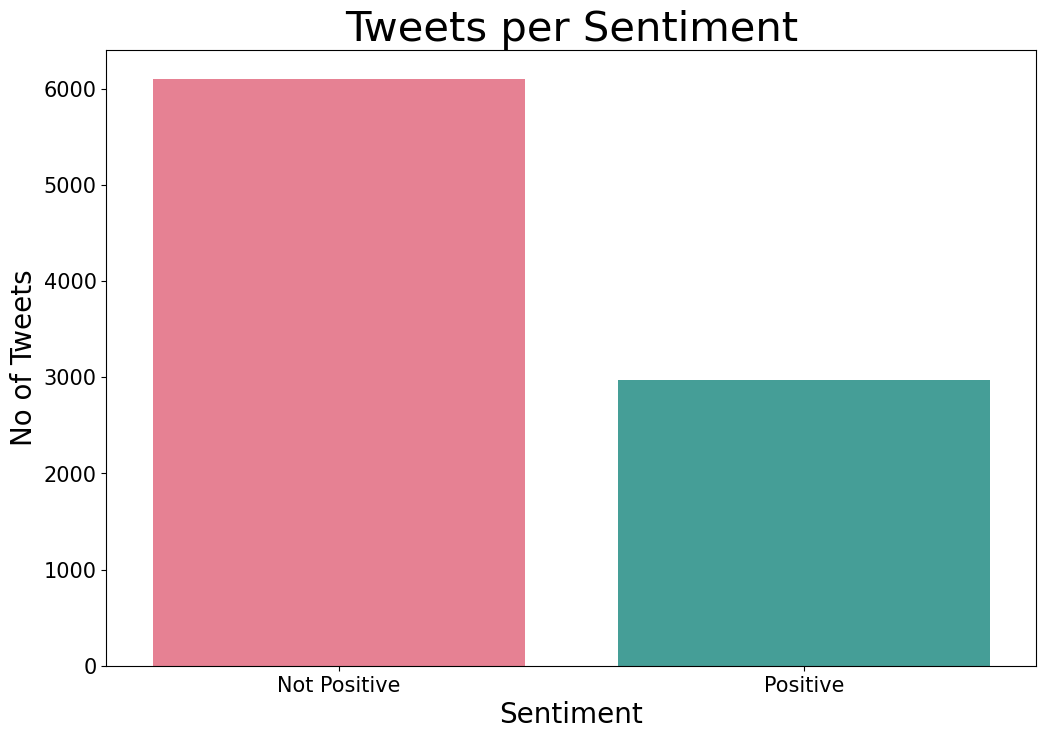

In [1103]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data = df, x = "Sentiment", order = df["Sentiment"].value_counts().index , palette="husl")
ax.set_xticklabels(labels = ["Not Positive", "Positive"], fontsize = 15)
ax.set_xlabel(xlabel = "Sentiment", fontsize = 20)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.set_ylabel(ylabel = "No of Tweets", fontsize = 20)
ax.set_title(f"Tweets per Sentiment", fontsize = 30)
plt.show()

Before we can do a test-train split, let us clean our tweets. We will remove:
- stop words
- short words, punctuations and signs
- placeholders such as "link" and "video"
- websites
- special characters


In [1104]:
#Instantiate necessary tools
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")
stopwords_list = stopwords.words("english")
stopwords_list.append("sxsw")
stopwords_list.append("link")
lemma = WordNetLemmatizer()
tweet_tknzr = TweetTokenizer(strip_handles=True)

In [1105]:
def cleaned_tweets(text):
    
    #Remove handles from tweets
    no_handle = tweet_tknzr.tokenize(text)
    tweet = " ".join(no_handle) 
    #removing any punctuations, signs, placeholders, websites and special characters
    clean = re.sub("(https?:\/\/\S+) \
                   |(#[A-Za-z0-9_]+) \
                   |(\{([a-zA-Z].+)\}) \
                   |(&[a-z]+;) \
                   |(www\.[a-z]?\.?(com)+|[a-z]+\.(com))\
                   |({link})\
                   |(\[video\])\
                   |([^\x00-\x7F]+\ *(?:[^\x00-\x7F]| )*)"," ", tweet)
    #making lowercase
    lower = clean.lower()
    #Removing short words (less than 3 characters)
    token_list = tokenizer.tokenize(lower)
    # Removing stop words
    stopwords_removed=[token for token in token_list if token not in stopwords_list]
    #Lemmatizing remaining tokens
    lemma_list = [lemma.lemmatize(token) for token in stopwords_removed]
    
    cleaned_text = " ".join(lemma_list) 
    return cleaned_text

Test-Train split

In [1106]:
# Tweets as input variables
X = df[['Tweet']]
# Sentiments as target
y = df['Sentiment']
#First train test split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

#Second train test split
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=42)
X_train

,Tweet
4878,"Really? So, no Google Me or Circles for now? R..."
1605,Nice! RT @mention knitted staircase in attenda...
732,Posterous Joins The SXSW Pile On With Posterou...
4073,Hope people ask the tough questions. RT @menti...
2119,"NYT, WSJ at #SXSW ask: Is there a future for b..."
...,...
499,Is he the first person in the queue at the new...
7826,Qrafter is better than all paid or free QR Cod...
8834,@mention Was just chatting with someone about ...
2745,The iPhone version of Flipboard is being total...


In [1107]:
#Checking
cleaned_tweets(X_train['Tweet'].iloc[5622])

'actually giving away free taplynx iphone ipad app licence away bit pushsxsw11 check'

In [1108]:
#Applying across our training data
X_train['Tweet'] = X_train['Tweet'].apply(lambda x: cleaned_tweets(x))
X_val['Tweet'] = X_val['Tweet'].apply(lambda x: cleaned_tweets(x))
print(X_train)
print("_________________")
print(X_val)
print("_________________")
print(y_train)
print("_________________")
print(y_val)

                                                  Tweet
4878  really google circle launching product plenty ...
1605  nice knitted staircase attendance party tomo 7...
732   posterous join pile posterous event iphone tec...
4073  hope people ask tough question reminder androi...
2119   nyt wsj ask future branded native news apps ipad
...                                                 ...
499       first person queue new apple store austin may
7826  qrafter better paid free code apps scan vcards...
8834  chatting someone proliferation ipad like ipad ...
2745  iphone version flipboard totally redesigned pl...
2730  front gate ticket present morning party http s...

[6120 rows x 1 columns]
_________________
                                                  Tweet
2437  google bing page rank panel ridiculously crowd...
8170  xcitng approaching soft launch plan android de...
8914  join lenewz free donut massage trade show boot...
8726  twitter buzz apple store temporary apple store...
7491 

# Data Modelling

Starting off with Naive Bayes

In [1109]:
#Creating a pipeline
pipe_naive = Pipeline(steps=[
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('naive', MultinomialNB())
])
# Doing cross validation
crossval_naive = cross_validate(pipe_naive, X_train['Tweet'], y_train, return_train_score=True, \
                    scoring=['accuracy', 'recall','roc_auc'])

print(crossval_naive)
print ("_______")

# Mean train accuracy
print("Mean train accuracy:", crossval_naive['train_accuracy'].mean())

# Mean test accuracy
print("Mean test accuracy:", crossval_naive['test_accuracy'].mean())


{'fit_time': array([0.13421106, 0.12179327, 0.11407495, 0.12049937, 0.12383795]), 'score_time': array([0.07100677, 0.07505441, 0.06395674, 0.07056546, 0.06621814]), 'test_accuracy': array([0.70506536, 0.69771242, 0.71732026, 0.70669935, 0.70669935]), 'train_accuracy': array([0.79677288, 0.79575163, 0.79616013, 0.78982843, 0.79207516]), 'test_recall': array([0.13994911, 0.13231552, 0.18020305, 0.14213198, 0.14467005]), 'train_recall': array([0.3847619 , 0.37650794, 0.38055909, 0.36658196, 0.3678526 ]), 'test_roc_auc': array([0.6978272 , 0.69006194, 0.70762797, 0.7128249 , 0.73314476]), 'train_roc_auc': array([0.89497847, 0.8977838 , 0.89386828, 0.89115113, 0.89111566])}
_______
Mean train accuracy: 0.7941176470588235
Mean test accuracy: 0.7066993464052288


The mean train accuracy is approx 79.41% while the mean train accuracy is approx 70.66%. This suggests overfitting since the model is performing better on the training than the testing

In [1110]:
# fitting training data to simple naive bayes
pipe_naive.fit(X_train["Tweet"], y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('naive', MultinomialNB())])

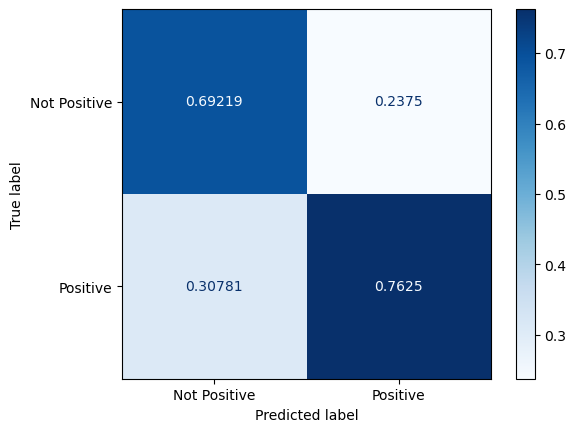

In [1111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# plot confusion matrix
ConfusionMatrixDisplay.from_estimator(
    pipe_naive, 
    X_val["Tweet"], 
    y_val, 
    display_labels=["Not Positive", "Positive"],
    cmap=plt.cm.Blues, 
    values_format='.5g',
    normalize="pred"
)
plt.show()

Lets compare the accuracy of the model on the training and validation data set

In [1112]:
print('Training set accuracy:', pipe_naive.score(X_train['Tweet'], y_train))
print('Validation set accuracy:', pipe_naive.score(X_val['Tweet'], y_val))


Training set accuracy: 0.7928104575163398
Validation set accuracy: 0.6976972072513474


The training accuracy is higher than the validation accuracy suggesting overfitting. Let us attempt hyperparameter tuning

In [1113]:
#Creating a pipeline with hyperparameter tuning
pipe_naive_tuned = Pipeline(steps=[
    ('tfidf_vectorizer_tuned', TfidfVectorizer(max_df=.99,min_df=0.005, max_features=900)),
    ('naive_tuned', MultinomialNB(alpha=.1))
])
#Crossvalidation
crv_naive_tuned = cross_validate(pipe_naive_tuned, X_train['Tweet'], y_train, return_train_score=True, \
                    scoring=['accuracy', 'recall','roc_auc'])

crv_naive_tuned

{'fit_time': array([0.19041491, 0.12466812, 0.13954592, 0.11134005, 0.11003804]),
 'score_time': array([0.0781343 , 0.07162333, 0.08534169, 0.05877233, 0.06122136]),
 'test_accuracy': array([0.69607843, 0.69117647, 0.72058824, 0.7124183 , 0.70506536]),
 'train_accuracy': array([0.72344771, 0.72589869, 0.72385621, 0.7183415 , 0.72487745]),
 'test_recall': array([0.18829517, 0.18320611, 0.23604061, 0.1928934 , 0.19543147]),
 'train_recall': array([0.23809524, 0.24888889, 0.22808132, 0.23697586, 0.23506989]),
 'test_roc_auc': array([0.66966744, 0.66884682, 0.69409822, 0.68786007, 0.6763623 ]),
 'train_roc_auc': array([0.73708866, 0.74006863, 0.73549216, 0.73307345, 0.73968708])}

In [1114]:
# Mean train accuracy
print("Mean train accuracy:", crv_naive_tuned['train_accuracy'].mean())

# Mean test accuracy
print("Mean test accuracy:", crv_naive_tuned['test_accuracy'].mean())

Mean train accuracy: 0.7232843137254902
Mean test accuracy: 0.7050653594771242


The disparity in model accuracy is much smaller between train and test data. I shall attempt to fit on all training data

In [1115]:
#fitting tuned model on all training data
pipe_naive_tuned.fit(X_train["Tweet"], y_train)

Pipeline(steps=[('tfidf_vectorizer_tuned',
                 TfidfVectorizer(max_df=0.99, max_features=900, min_df=0.005)),
                ('naive_tuned', MultinomialNB(alpha=0.1))])

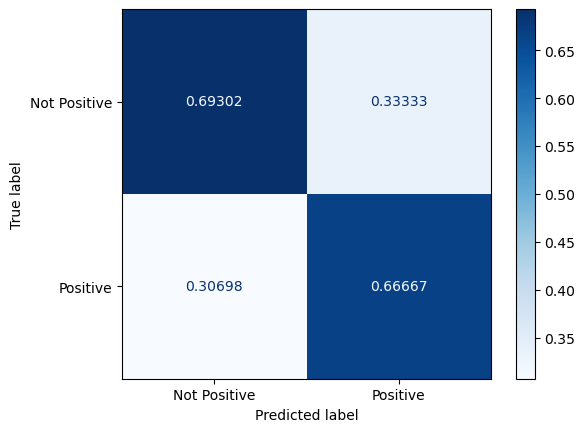

In [1116]:
# plot confusion matrix
ConfusionMatrixDisplay.from_estimator(
    pipe_naive_tuned, 
    X_val["Tweet"], 
    y_val, 
    display_labels=["Not Positive", "Positive"],
    cmap=plt.cm.Blues, 
    values_format='.5g',
    normalize="pred"
)
plt.show()

In [1117]:
print('Training set accuracy:', pipe_naive_tuned.score(X_train['Tweet'], y_train))
print('Validation set accuracy:', pipe_naive_tuned.score(X_val['Tweet'], y_val))

Training set accuracy: 0.7197712418300654
Validation set accuracy: 0.6903478686918177


The accuracy of the model is much better with training and validation data set accuracy having a very small margin of difference. Let us attempt using another method to see which is better. This time we will use neural network with regularization, and compare with naive bayes

# Neural Network with Regularization

In [1118]:
# Setting the data as a series object so it runs on a neural network
X_train = X_train["Tweet"]
X_val = X_val["Tweet"]

print(type(X_train))
print(type(X_val))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [1119]:
# Instatiating the Tokenizer
k_tokenizer = keras.preprocessing.text.Tokenizer()

#fitting tokenizer on training data
k_tokenizer.fit_on_texts(X_train)

#tokenizing text
X_train_token = k_tokenizer.texts_to_sequences(X_train)
X_val_token = k_tokenizer.texts_to_sequences(X_val)

In [1120]:
# Padding tweets to reach max length
max_length = max([len(tweet.split()) for tweet in X_train])

X_train_processed = keras.preprocessing.sequence.pad_sequences(
    X_train_token, maxlen=max_length, padding='post')
X_val_processed = keras.preprocessing.sequence.pad_sequences(
    X_val_token, maxlen=max_length, padding='post')

I created an embedding matrix from pre-trained GloVe embeddings for words in my vocabulary, using pretrained twitter words from "https://github.com/stanfordnlp/GloVe/blob/master/README.md#download-pre-trained-word-vectors"

In [1121]:
def create_embedding_matrix(glove_filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(glove_filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [1122]:
#sets the embedding dimensions
embedding_dim = 100
embedding_matrix = create_embedding_matrix("C:\Moringa\Phase 4\Project\glove.twitter.27B\glove.twitter.27B.100d.txt",
                                           k_tokenizer.word_index, 
                                           embedding_dim)

Now that I have an embedding matrix, I proceeded to define a neural network model to analyse the data set

In [1123]:
#Set vocabulary size
vocab_size = len(k_tokenizer.word_index) + 1 
# Instantiate neural network
model = keras.models.Sequential()
# Embedding layer
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=max_length, 
                           trainable=True))
# Flattening layer
model.add(layers.Flatten())
# Dropout layer - Regularizing model by setting 50% of input to 0
model.add(Dropout(0.5))
# hidden layer
model.add(layers.Dense(350, activation='sigmoid',
                       kernel_regularizer=regularizers.l2(l2=1e-3),
                       bias_regularizer=regularizers.l2(1e-3),
                      activity_regularizer=regularizers.l2(1e-3)))
# Drop out half of hidden layer
model.add(Dropout(0.5))
# Add second dense layer
model.add(layers.Dense(350, activation='sigmoid',
                       kernel_regularizer=regularizers.l2(l2=1e-3),
                       bias_regularizer=regularizers.l2(1e-3),
                      activity_regularizer=regularizers.l2(1e-3)))
# Output layer
model.add(layers.Dense(1, activation='sigmoid'))
# Compiling model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 18, 100)           709600    
                                                                 
 flatten_18 (Flatten)        (None, 1800)              0         
                                                                 
 dropout_36 (Dropout)        (None, 1800)              0         
                                                                 
 dense_54 (Dense)            (None, 350)               630350    
                                                                 
 dropout_37 (Dropout)        (None, 350)               0         
                                                                 
 dense_55 (Dense)            (None, 350)               122850    
                                                                 
 dense_56 (Dense)            (None, 1)               

I can now fit the model to all training data. I will also include an early stopping callback so I dont overtrain the model.

In [1124]:
from keras.callbacks import EarlyStopping

# Instantiating early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=3,  # Number of epochs to wait for improvement
                               restore_best_weights=True,  # Restore model with best weights
                               verbose=1)

# Fitting the model
history = model.fit(X_train_processed, y_train, 
                    batch_size=50, 
                    epochs=5, 
                    validation_data=(X_val_processed, y_val))

Epoch 1/5
123/123 [==============================] - 5s 26ms/step - loss: 1.1567 - accuracy: 0.6758 - val_loss: 0.9361 - val_accuracy: 0.6580
Epoch 2/5
123/123 [==============================] - 3s 21ms/step - loss: 0.8494 - accuracy: 0.6913 - val_loss: 0.8052 - val_accuracy: 0.6854
Epoch 3/5
123/123 [==============================] - 3s 21ms/step - loss: 0.7506 - accuracy: 0.7144 - val_loss: 0.7546 - val_accuracy: 0.7021
Epoch 4/5
123/123 [==============================] - 3s 21ms/step - loss: 0.7017 - accuracy: 0.7382 - val_loss: 0.7315 - val_accuracy: 0.7163
Epoch 5/5
123/123 [==============================] - 3s 21ms/step - loss: 0.6655 - accuracy: 0.7626 - val_loss: 0.7199 - val_accuracy: 0.7217


In [1125]:
# Visualize NN training history
def visualize_training_results(history):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()


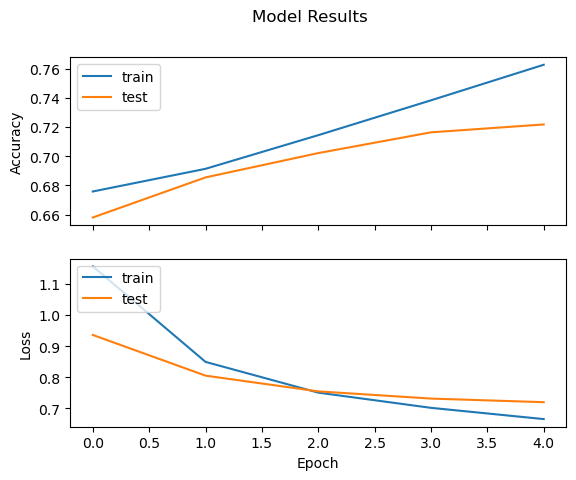

In [1126]:
visualize_training_results(history)

In [1127]:
# Evaluating model based on training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Printing the last epoch results
print(f"Final Training Loss: {train_loss[-1]}")
print(f"Final Training Accuracy: {train_accuracy[-1]}")
print(f"Final Validation Loss: {val_loss[-1]}")
print(f"Final Validation Accuracy: {val_accuracy[-1]}")


Final Training Loss: 0.6655302047729492
Final Training Accuracy: 0.7625817060470581
Final Validation Loss: 0.7198595404624939
Final Validation Accuracy: 0.7217050194740295


# Results Review

Comparing accuracies 

*Naive Bayes:*
Training set accuracy: 0.7197712418300654
Validation set accuracy: 0.6903478686918177

*Neural Network:*
Final Training Accuracy: 0.7629085183143616
Final Validation Accuracy: 0.7133758068084717

- The Naive Bayes model performs decently but has a slight drop in accuracy on the validation set, indicating it struggles with generalizing to unseen data.

- The Neural Network outperforms Naive Bayes, showing better performance on both training and validation sets. However, the validation accuracy is still lower than training accuracy, suggesting some overfitting. This can be solved by further hyperparameter tuning


# Recommendations & Conclusion

I therefore recommend going ahead with the Neural Network (instead of Naive Bayes) for twitter sentiment analysis. It does a better job overall of linking a sentiment to a Brand (in this case positive and negative emotion towards Apple and Google Products)
- Any data scientist using it will need to further hyperparameter tune for more optimal results
- The model will also require mor datasets for training and I suggest that the two organizations - Apple and Google - may assist in providing additional data.

How the Neural Network Model can be used by Apple and Google Tech companies:

- Brand Monitoring: Track the sentiment of tweets about Apple and Google products in real-time. This will help them monitor how their products are perceived and they can address any issues more efficiently.

- Customer Feedback Analysis: Automatically classify customer feedback (positive and non positive sentiments) to identify areas where products are performing well and where improvements are needed.

- Marketing Strategy: Use the sentiment analysis to refine marketing campaigns. Positive sentiments can be used to guid promotional efforts, while negative sentiments can be used to improve campaigns.

- Trend Analysis: Analyze sentiment trends over time to detect shifts in consumer perception so they can anticipate a crisis before it happens

